In [1]:
!rm df-*-checkpoint.csv

zsh:1: no matches found: df-*-checkpoint.csv


In [1]:
import os
import glob

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load all datasets

In [3]:
all_files = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df = df.drop_duplicates()
print(df.shape)

(263, 20)


In [4]:
df['Orchestrator'] = df['Orchestrator'].astype('category')
df['Benchmark'] = df['Benchmark'].astype('category')
df['Exp'] = df['Exp'].astype('category')
# df['Latency'] = df['Latency']
df['Requests'] = df['Requests'].astype(int)

In [5]:
df_0 = df.loc[df['Exp'] == 'exp0']
df_1 = df.loc[df['Exp'] == 'exp1']
df_2 = df.loc[df['Exp'] == 'exp2']
df_3 = df.loc[df['Exp'] == 'exp3']
df_4 = df.loc[df['Exp'] == 'exp4']
df_5 = df.loc[df['Exp'] == 'exp5']
df_6 = df.loc[df['Exp'] == 'exp6']
df_7 = df.loc[df['Exp'] == 'exp7']
df_8 = df.loc[df['Exp'] == 'exp8']
df_9 = df.loc[df['Exp'] == 'exp9']
df_10 = df.loc[df['Exp'] == 'exp10']
df_11 = df.loc[df['Exp'] == 'exp11']

In [6]:
# Global settings
fontsize = 20
legend_location = "lower right"

# Exp9 Redeployment

In [15]:
# Define the allowed values
allowed_values = [500, 1000, 2000, 3000, 4000, 6000, 10000, 15000]

# Filter the DataFrame
df_9 = df_9[df_9['Requests'].isin(allowed_values)]
print("\nFiltered DataFrame:")


Filtered DataFrame:


In [16]:
df_9.iloc[:,[0,1,2,5,6,10,11,12,-1]].head()

,Latency,Requests,Throughput,Orchestrator,Benchmark,Availability,Horizontal,Vertical,ReqSec
0,4.03,500,14827.0,swarm,mm,0,1,1,493.56
1,6.54,500,14829.0,swarm,sn,0,1,1,493.71
2,6.84,500,14719.0,swarm,sn,0,1,1,489.81
3,7.18,500,14720.0,swarm,sn,0,1,1,489.77
4,3.40,500,14828.0,swarm,mm,0,1,1,493.96


In [17]:
df_9.shape

(72, 20)

In [9]:
labels = df_9['Benchmark'].unique()

In [10]:
df_9

,Latency,Requests,Throughput,Measured_Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,N,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
0,4.03,500,14827.0,9842,0,swarm,mm,0,exp9,3,0,1,1,8,512,30,2.942,11.928,0.410,493.56
1,6.54,500,14829.0,9843,0,swarm,sn,0,exp9,3,0,1,1,8,512,30,2.407,8.792,1.692,493.71
2,6.84,500,14719.0,9863,0,swarm,sn,0,exp9,2,0,1,1,8,512,30,2.512,36.256,1.767,489.81
3,7.18,500,14720.0,9863,0,swarm,sn,0,exp9,1,0,1,1,8,512,30,2.503,12.176,1.838,489.77
4,3.40,500,14828.0,9842,0,swarm,mm,0,exp9,2,0,1,1,8,512,30,2.551,7.484,0.281,493.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,4410.00,15000,410818.0,281005,0,swarm,hr,0,exp9,1,0,1,1,8,512,30,2121.005,5709.824,888.202,13694.49
80,9220.00,15000,380279.0,243189,0,swarm,sn,0,exp9,3,0,1,1,8,512,30,2120.595,12353.536,2391.053,12676.10
81,19560.00,15000,157516.0,104844,0,swarm,mm,0,exp9,1,0,1,1,8,512,30,12691.616,21151.744,3778.686,5250.69
82,12000.00,15000,347509.0,219254,0,swarm,sn,0,exp9,1,0,1,1,8,512,30,3254.388,16269.312,3048.300,11584.06


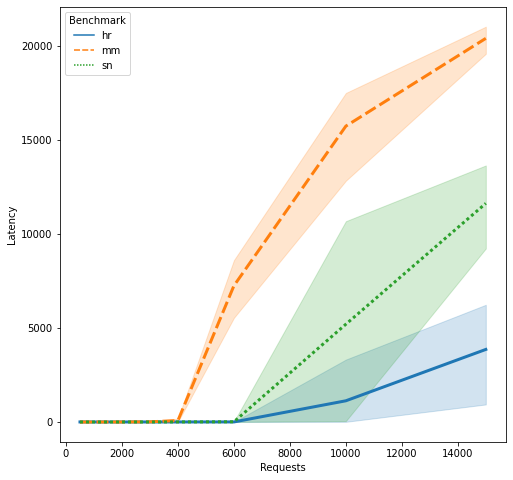

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
labels = ["sn", "mm", "hr"]

p = sns.lineplot(x="Requests", y="Latency", data=df_9, hue="Benchmark", style='Benchmark', linewidth=3)

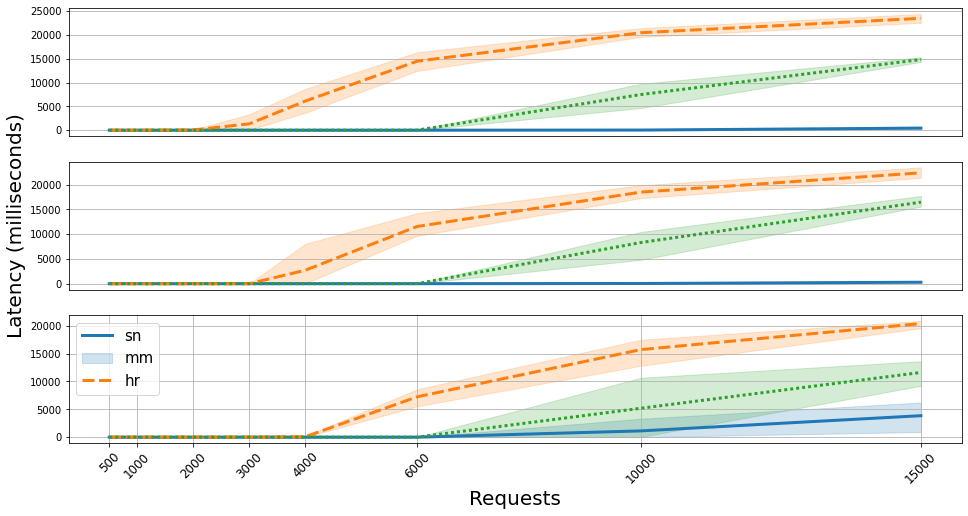

In [29]:
# Exp7
fig, ax = plt.subplots(3, 1, figsize=(16,8))
xticks = df_7['Requests'].unique()

plt.subplot(311)
p = sns.lineplot(x="Requests", y="Latency", data=df_7, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.axes.xaxis.set_visible(False)
# p.axes.yaxis.set_visible(False)
plt.ylabel("")
p.set_xticks(xticks)
plt.grid(True)

# plt.ylabel('Latency (milliseconds)', fontsize=12)


# Exp8
plt.subplot(312)
p = sns.lineplot(x="Requests", y="Latency", data=df_8, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
plt.ylabel('Latency (milliseconds)', fontsize=20)
p.axes.xaxis.set_visible(False)
plt.grid(True)


# Exp9
plt.subplot(313)
p = sns.lineplot(x="Requests", y="Latency", data=df_9, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.set_xticks(xticks)
# plt.ylabel('Latency (milliseconds)', fontsize=12)
plt.ylabel("")

plt.xticks(rotation = 45, fontsize=12)
plt.xlabel('Requests', fontsize=20)

# plt.ylabel()
labels = ["sn", "mm", "hr"]
plt.legend(labels, fontsize=15)
plt.grid(True)

# plt.legend(fontsize=15)
# plt.savefig("Figures/exp9-exp8-exp7.png", bbox_inches='tight')
plt.show()

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrames for experiments
df_exp7 = pd.DataFrame({
    'Requests': [10, 20, 30, 40, 50],
    'Latency': [1, 2, 3, 4, 5],
    'Benchmark': ['sn', 'sn', 'mm', 'mm', 'hr'],
    'Experiment': ['7'] * 5
})

df_exp8 = pd.DataFrame({
    'Requests': [10, 20, 30, 40, 50],
    'Latency': [1.5, 2.5, 3.5, 4.5, 5.5],
    'Benchmark': ['sn', 'mm', 'hr', 'sn', 'mm'],
    'Experiment': ['8'] * 5
})

df_exp9 = pd.DataFrame({
    'Requests': [10, 20, 30, 40, 50],
    'Latency': [0.5, 1.5, 2.5, 3.5, 4.5],
    'Benchmark': ['sn', 'mm', 'hr', 'sn', 'mm'],
    'Experiment': ['9'] * 5
})
# Combine the DataFrames
combined_df = pd.concat([df_exp7, df_exp8, df_exp9]).reset_index()



In [33]:
combined_df.reset_index()

,index,Requests,Latency,Benchmark,Experiment
0,0,10,1.0,sn,7
1,1,20,2.0,sn,7
2,2,30,3.0,mm,7
3,3,40,4.0,mm,7
4,4,50,5.0,hr,7
5,0,10,1.5,sn,8
6,1,20,2.5,mm,8
7,2,30,3.5,hr,8
8,3,40,4.5,sn,8
9,4,50,5.5,mm,8


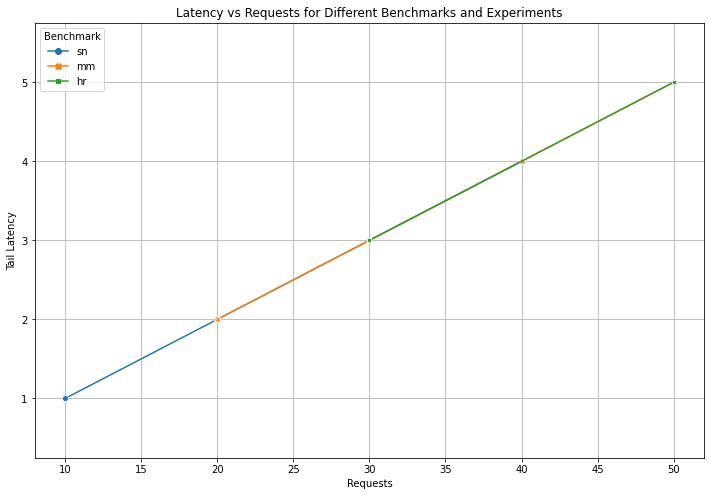

In [35]:

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=combined_df, x='Requests', y='Latency', hue='Benchmark', style='Benchmark', markers=True, dashes=False)
plt.title('Latency vs Requests for Different Benchmarks and Experiments')
plt.xlabel('Requests')
plt.ylabel('Tail Latency')
# plt.legend(title='Benchmark/Experiment')
plt.grid(True)
plt.show()

In [7]:
combined_df = pd.concat([df_7, df_8, df_9]).reset_index()

# Rename the column
combined_df.rename(columns={"Exp": "Experiment"}, inplace=True)

# Replace the values for the Experiment column
combined_df['Experiment'].replace({
    'exp7': 'Baseline',
    'exp8': 'Temporal',
    'exp9': 'Redeployment'
}, inplace=True)

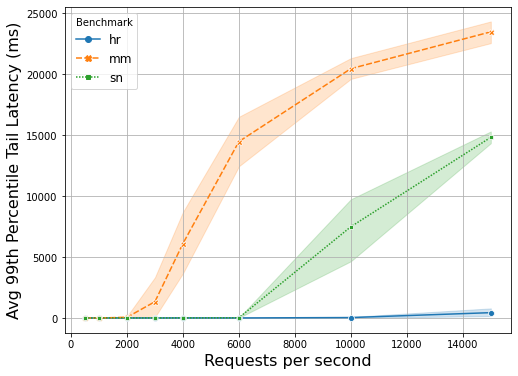

In [9]:
# Filter for the Baseline experiment only
baseline_df = combined_df[combined_df['Experiment'] == 'Baseline']

# Plot the Baseline experiment using Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(data=baseline_df, x='Requests', y='Latency', hue='Benchmark', dashes=True, markers=True, ci=95, style='Benchmark')

# plt.title('Baseline: Latency vs Requests for Different Benchmarks')
plt.xlabel('Requests per second', fontsize=16)
plt.ylabel('Avg 99th Percentile Tail Latency (ms)', fontsize=16)
# plt.ylim(bottom=0)  # Ensure y-axis starts at 0

plt.grid(True)
plt.legend(title='Benchmark', fontsize=12)
plt.savefig("exp7.png", bbox_inches='tight')

/var/folders/nv/p_yx9k0j763cnbwqk5j012t80000gn/T/ipykernel_36948/3169469090.py:15: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


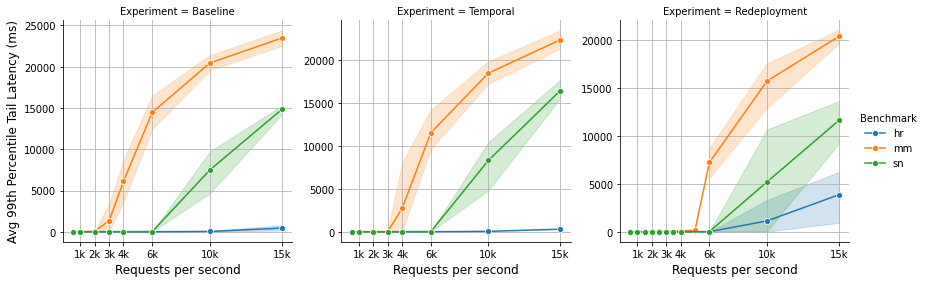

In [11]:
g = sns.FacetGrid(combined_df, col="Experiment", hue="Benchmark", col_wrap=3, height=4, sharey=False)
g = g.map(sns.lineplot, 'Requests', 'Latency', marker='o').add_legend()

# Define the custom ticks for the x-axis
custom_ticks = [1000, 2000, 3000, 4000, 6000, 10000, 15000]
custom_tick_labels = ['1k', '2k', '3k', '4k', '6k', '10k', '15k']

# Add grid and custom x-ticks to each facet
for ax in g.axes.flat:
    ax.grid(True)
    ax.set_xticks(custom_ticks)
    ax.set_xticklabels(custom_tick_labels)
    ax.set_xlabel("Requests per second", fontsize=12)
    # ax.set_ylim(0)  # Set the lower limit of the y-axis to 0
    if ax.is_first_col(): 
        ax.set_ylabel("Avg 99th Percentile Tail Latency (ms)", fontsize=12)
    else:
        ax.set_ylabel('')
    
plt.savefig("exp7-exp8-exp9.png", bbox_inches='tight')

In [ ]:
g = sns.relplot(
    data=combined_df, 
    x='Requests', y='Latency', 
    kind='line', hue='Benchmark', 
    style='Benchmark', col='Experiment', 
    col_wrap=3, height=4, markers=True, dashes=True
)

# Add grid to each facet
for ax in g.axes.flat:
    ax.grid(True)

/var/folders/nv/p_yx9k0j763cnbwqk5j012t80000gn/T/ipykernel_24037/36843868.py:20: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


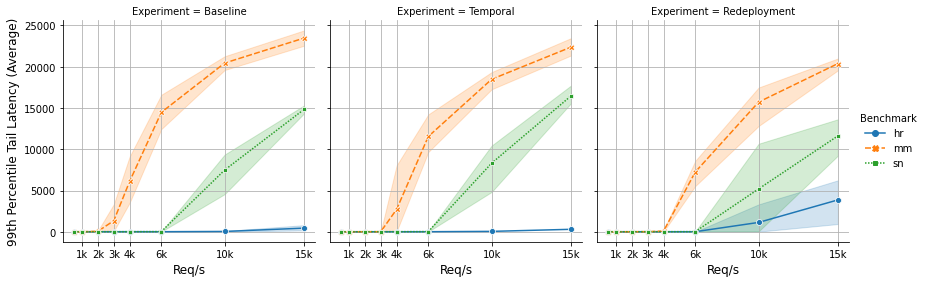

In [100]:
# Relational plot with line kind
g = sns.relplot(
    data=combined_df, 
    x='Requests', y='Latency', 
    kind='line', hue='Benchmark', 
    style='Benchmark', col='Experiment', 
    col_wrap=3, height=4, markers=True, dashes=True
)

# Define the custom ticks for the x-axis
custom_ticks = [1000, 2000, 3000, 4000, 6000, 10000, 15000]
custom_tick_labels = ['1k', '2k', '3k', '4k', '6k', '10k', '15k']

# Add grid and custom x-ticks to each facet
for ax in g.axes.flat:
    ax.grid(True)
    ax.set_xticks(custom_ticks)
    ax.set_xticklabels(custom_tick_labels)
    ax.set_xlabel("Req/s", fontsize=12)
    if ax.is_first_col(): 
        ax.set_ylabel("99th Percentile Tail Latency (Average)", fontsize=12)
    else:
        ax.set_ylabel('')

plt.savefig("exp7-exp8-exp9.png", bbox_inches='tight')

/var/folders/nv/p_yx9k0j763cnbwqk5j012t80000gn/T/ipykernel_24037/2077496793.py:14: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


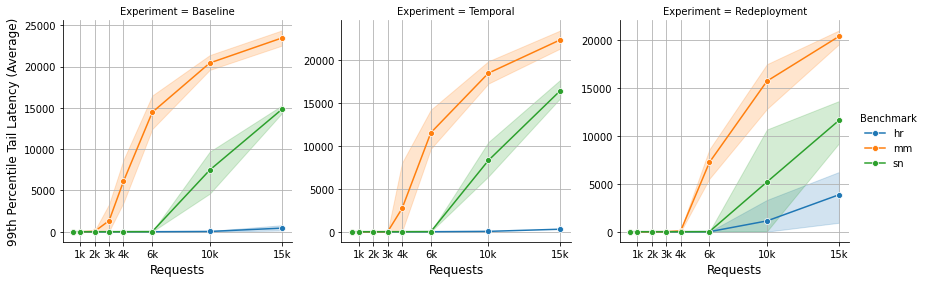

In [64]:
g = sns.FacetGrid(combined_df, col="Experiment", hue="Benchmark", col_wrap=3, height=4, sharey=False)
g = g.map(sns.re[;, 'Requests', 'Latency', marker='o').add_legend()

# Relational plot with line kind
g = sns.relplot(
    data=combined_df, 
    x='Requests', y='Latency', 
    kind='line', hue='Benchmark', 
    style='Benchmark', col='Experiment', 
    col_wrap=3, height=4, markers=True, dashes=True
)
# Define the custom ticks for the x-axis
custom_ticks = [1000, 2000, 3000, 4000, 6000, 10000, 15000]
custom_tick_labels = ['1k', '2k', '3k', '4k', '6k', '10k', '15k']

# Add grid and custom x-ticks to each facet
for ax in g.axes.flat:
    ax.grid(True)
    ax.set_xticks(custom_ticks)
    ax.set_xticklabels(custom_tick_labels)
    ax.set_xlabel("Req/s", fontsize=12)
    if ax.is_first_col(): 
        ax.set_ylabel("99th Percentile Tail Latency (Average)", fontsize=12)
    else:
        ax.set_ylabel('')

    
plt.savefig("exp7-exp8-exp9.png", bbox_inches='tight')